<a href="https://colab.research.google.com/github/werelia/f1/blob/main/f1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
circuits = pd.read_csv('https://raw.githubusercontent.com/AkhilRD/F1-Explorative-Analysis/main/circuits.csv')
laptimes = pd.read_csv('https://raw.githubusercontent.com/AkhilRD/F1-Explorative-Analysis/main/lap_times.csv')
pitstops = pd.read_csv('https://raw.githubusercontent.com/AkhilRD/F1-Explorative-Analysis/main/pit_stops.csv')
seasons = pd.read_csv('https://raw.githubusercontent.com/AkhilRD/F1-Explorative-Analysis/main/seasons.csv',parse_dates=['year'])
status = pd.read_csv('https://raw.githubusercontent.com/AkhilRD/F1-Explorative-Analysis/main/status.csv')
constructor_standings = pd.read_csv('https://raw.githubusercontent.com/AkhilRD/F1-Explorative-Analysis/main/constructor_standings.csv')
constructors = pd.read_csv('https://raw.githubusercontent.com/AkhilRD/F1-Explorative-Analysis/main/constructors.csv')
driver_standings = pd.read_csv('https://raw.githubusercontent.com/AkhilRD/F1-Explorative-Analysis/main/driver_standings.csv')
drivers = pd.read_csv('https://raw.githubusercontent.com/AkhilRD/F1-Explorative-Analysis/main/drivers.csv')
races = pd.read_csv('https://raw.githubusercontent.com/AkhilRD/F1-Explorative-Analysis/main/races.csv',parse_dates=['year'])
constructor_results = pd.read_csv('https://raw.githubusercontent.com/AkhilRD/F1-Explorative-Analysis/main/constructor_results.csv')
results = pd.read_csv('https://raw.githubusercontent.com/AkhilRD/F1-Explorative-Analysis/main/results.csv')
qualifying = pd.read_csv('https://raw.githubusercontent.com/AkhilRD/F1-Explorative-Analysis/main/qualifying.csv')

In [3]:
drivers.head()

,driverid,driverref,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,07-01-1985,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,0,HEI,Nick,Heidfeld,10-05-1977,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,27-06-1985,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,29-07-1981,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,0,KOV,Heikki,Kovalainen,19-10-1981,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


We see that the "number" column has some zero values, but they do not affect the analysis results because "number" represents the starting number of each driver.
We can remove this column.

In [4]:
drivers=drivers.drop('number', axis=1)
drivers.head()

,driverid,driverref,code,forename,surname,dob,nationality,url
0,1,hamilton,HAM,Lewis,Hamilton,07-01-1985,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,HEI,Nick,Heidfeld,10-05-1977,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,ROS,Nico,Rosberg,27-06-1985,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,ALO,Fernando,Alonso,29-07-1981,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,KOV,Heikki,Kovalainen,19-10-1981,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


Now we can start explanatory data analysis.


Question 1. Which drivers are in the top 10 youngest and oldest drivers in this dataset?

In [5]:
youngest_drivers=drivers.sort_values("dob",ascending=False)[:10]
youngest_drivers

,driverid,driverref,code,forename,surname,dob,nationality,url
66,67,buemi,BUE,Sébastien,Buemi,31-10-1988,Swiss,http://en.wikipedia.org/wiki/S%C3%A9bastien_Buemi
320,321,bell,N,Derek,Bell,31-10-1941,British,http://en.wikipedia.org/wiki/Derek_Bell_(auto_...
214,215,guerra,N,Miguel Ángel,Guerra,31-08-1953,Argentine,http://en.wikipedia.org/wiki/Miguel_Angel_Guerra
228,229,ertl,N,Harald,Ertl,31-08-1948,Austrian,http://en.wikipedia.org/wiki/Harald_Ertl
283,284,pesenti_rossi,N,Alessandro,Pesenti-Rossi,31-08-1942,Italian,http://en.wikipedia.org/wiki/Alessandro_Pesent...
519,519,homeier,N,Bill,Homeier,31-08-1918,American,http://en.wikipedia.org/wiki/Bill_Homeier
793,793,sommer,N,Raymond,Sommer,31-08-1906,French,http://en.wikipedia.org/wiki/Raymond_Sommer
50,51,wilson,N,Justin,Wilson,31-07-1978,British,http://en.wikipedia.org/wiki/Justin_Wilson_(ra...
109,110,cesaris,N,Andrea,de Cesaris,31-05-1959,Italian,http://en.wikipedia.org/wiki/Andrea_de_Cesaris
302,303,vonlanthen,N,Jo,Vonlanthen,31-05-1942,Swiss,http://en.wikipedia.org/wiki/Jo_Vonlanthen


In [6]:
oldest_drivers=drivers.sort_values("dob")[:10]
oldest_drivers

,driverid,driverref,code,forename,surname,dob,nationality,url
754,754,balsa,N,Marcel,Balsa,01-01-1909,French,http://en.wikipedia.org/wiki/Marcel_Balsa
433,434,sharp,N,Hap,Sharp,01-01-1928,American,http://en.wikipedia.org/wiki/Hap_Sharp
247,248,gimax,N,Carlo,Franchi,01-01-1938,Italian,http://en.wikipedia.org/wiki/Gimax
234,235,ickx,N,Jacky,Ickx,01-01-1945,Belgian,http://en.wikipedia.org/wiki/Jacky_Ickx
232,233,stuck,N,Hans-Joachim,Stuck,01-01-1951,German,http://en.wikipedia.org/wiki/Hans_Joachim_Stuck
110,111,gounon,N,Jean-Marc,Gounon,01-01-1963,French,http://en.wikipedia.org/wiki/Jean-Marc_Gounon
46,47,baumgartner,N,Zsolt,Baumgartner,01-01-1981,Hungarian,http://en.wikipedia.org/wiki/Zsolt_Baumgartner
684,684,whitehouse,N,Bill,Whitehouse,01-04-1909,British,http://en.wikipedia.org/wiki/Bill_Whitehouse
270,271,kessel,N,Loris,Kessel,01-04-1950,Swiss,http://en.wikipedia.org/wiki/Loris_Kessel
74,75,nakano,N,Shinji,Nakano,01-04-1971,Japanese,http://en.wikipedia.org/wiki/Shinji_Nakano


Question 3. What are the 10 most popular nationalities in F1 history?

In [7]:
nationality=drivers.groupby('nationality').size()
nationality_sorted=nationality.sort_values(ascending=False)
nationality_sorted.head(10)

nationality
British          165
American         157
Italian           99
French            73
German            50
Brazilian         32
Argentine         24
Swiss             23
South African     23
Belgian           23
dtype: int64

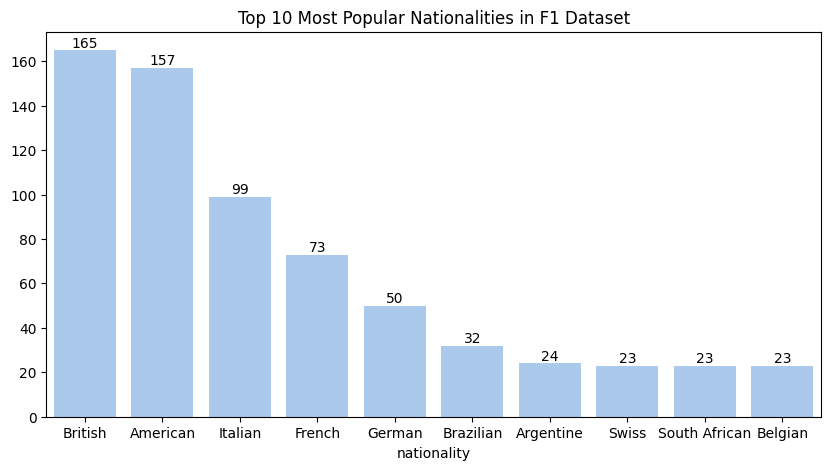

In [8]:
plt.figure(figsize=(10,5))
sns.set_palette("pastel")
ax=sns.barplot(x=nationality_sorted.index[:10],y=nationality_sorted.values[:10])
for i in ax.containers:
    ax.bar_label(i,)
ax.set_title("Top 10 Most Popular Nationalities in F1 Dataset")
plt.show()

In [9]:
circuits.head()

,circuitid,circuitref,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [10]:
circuits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitid   76 non-null     int64  
 1   circuitref  76 non-null     object 
 2   name        76 non-null     object 
 3   location    76 non-null     object 
 4   country     76 non-null     object 
 5   lat         76 non-null     float64
 6   lng         76 non-null     float64
 7   alt         76 non-null     int64  
 8   url         76 non-null     object 
dtypes: float64(2), int64(2), object(5)
memory usage: 5.5+ KB


In [15]:
circuits.rename(columns = {'circuitid':'circuitId'}, inplace = True)

Question 4. What are the 10 most used circuits in F1 history?

To answer this question we need to use information from another data set.

In [11]:
races.head()

,raceId,year,round,circuitId,name,date,time,url
0,1,2009-01-01,1,1,Australian Grand Prix,29/03/09,6:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009-01-01,2,2,Malaysian Grand Prix,05/04/09,9:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009-01-01,3,17,Chinese Grand Prix,19/04/09,7:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009-01-01,4,3,Bahrain Grand Prix,26/04/09,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009-01-01,5,4,Spanish Grand Prix,10/05/09,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [12]:
races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   raceId     1079 non-null   int64         
 1   year       1079 non-null   datetime64[ns]
 2   round      1079 non-null   int64         
 3   circuitId  1079 non-null   int64         
 4   name       1079 non-null   object        
 5   date       1079 non-null   object        
 6   time       1079 non-null   object        
 7   url        1079 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 67.6+ KB


In [13]:
count=races['circuitId'].value_counts()
#creating new data set with the most used circuts in order
freq=pd.DataFrame({'circuitId':count.index,'number_of_times':count.values})
freq

,circuitId,number_of_times
0,14,72
1,6,68
2,9,57
3,13,55
4,20,41
...,...,...
71,60,1
72,42,1
73,57,1
74,54,1


Now we can match two data sets to get the answer.

In [16]:
match=circuits[circuits['circuitId'].isin(freq['circuitId'])][['circuitId','country','name']]
match=match.merge(freq[['circuitId','number_of_times']],on='circuitId')
most_circuits=match.sort_values(by='number_of_times',ascending=False)
most_circuits[:10]


,circuitId,country,name,number_of_times
13,14,Italy,Autodromo Nazionale di Monza,72
5,6,Monaco,Circuit de Monaco,68
8,9,UK,Silverstone Circuit,57
12,13,Belgium,Circuit de Spa-Francorchamps,55
19,20,Germany,Nürburgring,41
6,7,Canada,Circuit Gilles Villeneuve,41
17,18,Brazil,Autódromo José Carlos Pace,39
9,10,Germany,Hockenheimring,37
10,11,Hungary,Hungaroring,37
68,70,Austria,Red Bull Ring,36


Question 5. What tracks were the races held on?

In [24]:
list=[]
top_10_gp=races['name'].value_counts()[:10]

for gp in top_10_gp.index:
  circuitID = races.loc[races['name'] == gp, 'circuitId'].value_counts()
  dfs = circuits.loc[circuits['circuitId'].isin(circuitID.index), ['circuitId', 'location', 'country', 'name']]
  dfs['number_of_times']=circuitID.values
  list.append(dfs)
  table=pd.concat(list)
  table.head()
